In [1]:
import pandas as pd
iris = pd.read_csv('./input_data/iris.csv')
iris['data_version'] = 1.0
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,data_version
0,5.1,3.5,1.4,0.2,setosa,1.0
1,4.9,3.0,1.4,0.2,setosa,1.0
2,4.7,3.2,1.3,0.2,setosa,1.0
3,4.6,3.1,1.5,0.2,setosa,1.0
4,5.0,3.6,1.4,0.2,setosa,1.0


In [17]:
from sqlalchemy import create_engine
import os

pgconfig = {
    'host': os.environ['DB_HOST'],
    'port': os.environ['DB_PORT'],
    'database': os.environ['DB_NAME'],
    'user': os.environ['DB_USER'],
    'password': os.environ['DB_PASSWORD']
}

engine = create_engine('postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}'.format(**pgconfig))

In [3]:
columns = [
    'data_version',
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width'
          ]

iris[columns].to_sql('iris_input', engine, if_exists='append', index=False)

In [27]:
%load_ext sql
dsl = 'postgres://{user}:{password}@{host}:{port}/{database}'.format(**pgconfig)
%sql $dsl

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: testuser@analysis'

In [29]:
%config SqlMagic.autopandas=True
df_input = %sql select * from iris_input
df_input.head()

 * postgres://testuser:***@db:5432/analysis
450 rows affected.


,id,data_version,sepal_length,sepal_width,petal_length,petal_width,create_timestamp
0,1,1.0,5.1,3.5,1.4,0.2,2020-01-23 19:10:34.376868
1,2,1.0,4.9,3.0,1.4,0.2,2020-01-23 19:10:34.376868
2,3,1.0,4.7,3.2,1.3,0.2,2020-01-23 19:10:34.376868
3,4,1.0,4.6,3.1,1.5,0.2,2020-01-23 19:10:34.376868
4,5,1.0,5.0,3.6,1.4,0.2,2020-01-23 19:10:34.376868


In [31]:
df_src = df_input[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df_src.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
from sklearn.cluster import KMeans
kms = KMeans( n_clusters=3, random_state=1)
clusters = kms.fit_predict(df_src)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1,

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca_values = pca.fit_transform(df_src)

In [34]:
df_pca = pd.DataFrame(pca.transform(df_src), columns=['pca1', 'pca2'])
df_pca.head()

,pca1,pca2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [35]:
df_plot = df_pca.assign(cluster_id=clusters)
df_plot.head()

,pca1,pca2,cluster_id
0,-2.684126,0.319397,1
1,-2.714142,-0.177001,1
2,-2.888991,-0.144949,1
3,-2.745343,-0.318299,1
4,-2.728717,0.326755,1


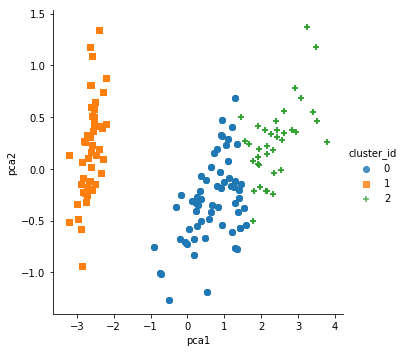

In [41]:
%matplotlib inline
import seaborn as sns

sns.lmplot(x='pca1', y='pca2', data=df_plot, hue='cluster_id', markers=['o', 's', '+'], fit_reg=False)

In [42]:
df_input.head()

,id,data_version,sepal_length,sepal_width,petal_length,petal_width,create_timestamp
0,1,1.0,5.1,3.5,1.4,0.2,2020-01-23 19:10:34.376868
1,2,1.0,4.9,3.0,1.4,0.2,2020-01-23 19:10:34.376868
2,3,1.0,4.7,3.2,1.3,0.2,2020-01-23 19:10:34.376868
3,4,1.0,4.6,3.1,1.5,0.2,2020-01-23 19:10:34.376868
4,5,1.0,5.0,3.6,1.4,0.2,2020-01-23 19:10:34.376868


In [43]:
df_save_target = df_plot.assign(id=df_input[['id']], data_version=df_input[['data_version']])
df_save_target.head()

,pca1,pca2,cluster_id,id,data_version
0,-2.684126,0.319397,1,1,1.0
1,-2.714142,-0.177001,1,2,1.0
2,-2.888991,-0.144949,1,3,1.0
3,-2.745343,-0.318299,1,4,1.0
4,-2.728717,0.326755,1,5,1.0


In [45]:
df_save_target[['id', 'data_version', 'pca1', 'pca2', 'cluster_id']].to_sql('iris_cluster', engine, if_exists='append', index=False)

In [46]:
%sql select * from iris_cluster limit 10

 * postgres://testuser:***@db:5432/analysis
10 rows affected.


,id,data_version,cluster_id,pca1,pca2,create_timestamp
0,1,1.0,1,-2.6841256259695334,0.31939724658510127,2020-01-23 20:32:46.239192
1,2,1.0,1,-2.7141416872943225,-0.17700122506477955,2020-01-23 20:32:46.239192
2,3,1.0,1,-2.8889905690592936,-0.1449494260855573,2020-01-23 20:32:46.239192
3,4,1.0,1,-2.7453428556414066,-0.31829897925191614,2020-01-23 20:32:46.239192
4,5,1.0,1,-2.728716536554527,0.3267545129349199,2020-01-23 20:32:46.239192
5,6,1.0,1,-2.2808596328444897,0.7413304490629149,2020-01-23 20:32:46.239192
6,7,1.0,1,-2.820537750740606,-0.08946138452856905,2020-01-23 20:32:46.239192
7,8,1.0,1,-2.62614497314663,0.16338495969832886,2020-01-23 20:32:46.239192
8,9,1.0,1,-2.88638273178055,-0.5783117541867036,2020-01-23 20:32:46.239192
9,10,1.0,1,-2.672755797820951,-0.11377424587411643,2020-01-23 20:32:46.239192
